# Imports and settings

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
%config Completer.use_jedi = False #autocompletion trick

# github version

## 

# **Questions to answer:**
#### 1. How are grades related to mental health status?
#### 2. Which study fields has the best/average/worst mental health status
#### 3. Does year that someone is currently on affect mental health? Earlier or later years have the better average mental health condition?
#### 4. How does age come to mental health status?
#### 5. Does gender matter? If so which gender has worse (based on answers) mental status?
#### 6. Does being in relationship change anything?
#### 7. Is there a correlation between having anxiety and panic attacks? Does having anxiety means that someone has panic attacks? or vice versa? (in regards of this dataset)
#### 8. From all these students how many of them actually seek mental help?

In [5]:
mh_df = pd.read_csv('../data/Student Mental health.csv')

In [6]:
mh_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [7]:
mh_df.shape # not so much data

(101, 11)

In [8]:
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [9]:
# year column needs to be fixed in order to use it later, lets make it an int.
# lets also change column names
mh_df.rename(columns={'Timestamp': 'date', 'Choose your gender':'gender', 'Age':'age', 'What is your course?': 'course', 'Your current year of Study':'year',
                      'What is your CGPA?': 'cgpa', 'Marital status':'relationship', 'Do you have Depression?': 'depressed',
                      'Do you have Anxiety?':'anxiety', 'Do you have Panic attack?': 'panic_attacks', 'Did you seek any specialist for a treatment?': 'seek_for_help'}, inplace=True)

# could also do this... 
# df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']

In [10]:
mh_df.head()

,date,gender,age,course,year,cgpa,relationship,depressed,anxiety,panic_attacks,seek_for_help
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [11]:
mh_df['year'].apply(lambda x: x[-1])

0      1
1      2
2      1
3      3
4      4
      ..
96     1
97     2
98     3
99     4
100    2
Name: year, Length: 101, dtype: object

In [12]:
mh_df['year'] = mh_df['year'].apply(lambda x: int(x[-1]))

In [13]:
mh_df.year.dtype # cool

dtype('int64')

In [14]:
mh_df.cgpa.unique() # 5 categories, one is doubled - unlucky whitespace

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [15]:
mh_df.cgpa = mh_df.cgpa.str.strip()

In [16]:
mh_df.cgpa.unique() # perfect

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

### 1. How are grades related to current mental health status? (cgpa vs depression/anxiety/panic attacks)

In [17]:
# to plot it we need numerical values, so we have to get rid of range of values.
mh_df['avg_cgpa'] = mh_df['cgpa'].apply(lambda x: np.mean([float(x.split(' ')[0]), float(x.split(' ')[2])]))

In [18]:
columns = ['relationship' ,'depressed' ,'anxiety' ,'panic_attacks' ,'seek_for_help']
for column in columns:
    mh_df[column] = mh_df[column].map({'Yes': 1, 'No': 0})

In [19]:
mh_df.head()

,date,gender,age,course,year,cgpa,relationship,depressed,anxiety,panic_attacks,seek_for_help,avg_cgpa
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0,3.245
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0,3.245
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,3.245


In [20]:
by_cgpa = mh_df.groupby('avg_cgpa')

In [21]:
question1_d = by_cgpa['depressed'].sum()
question1_a = by_cgpa['anxiety'].sum()
question1_p = by_cgpa['panic_attacks'].sum()

sns.set_context("notebook", font_scale=1)
sns.set_style("whitegrid")
sns.set_palette("husl",3) 
sns.set(rc={"lines.linewidth":2, 'figure.figsize': (24, 12)})

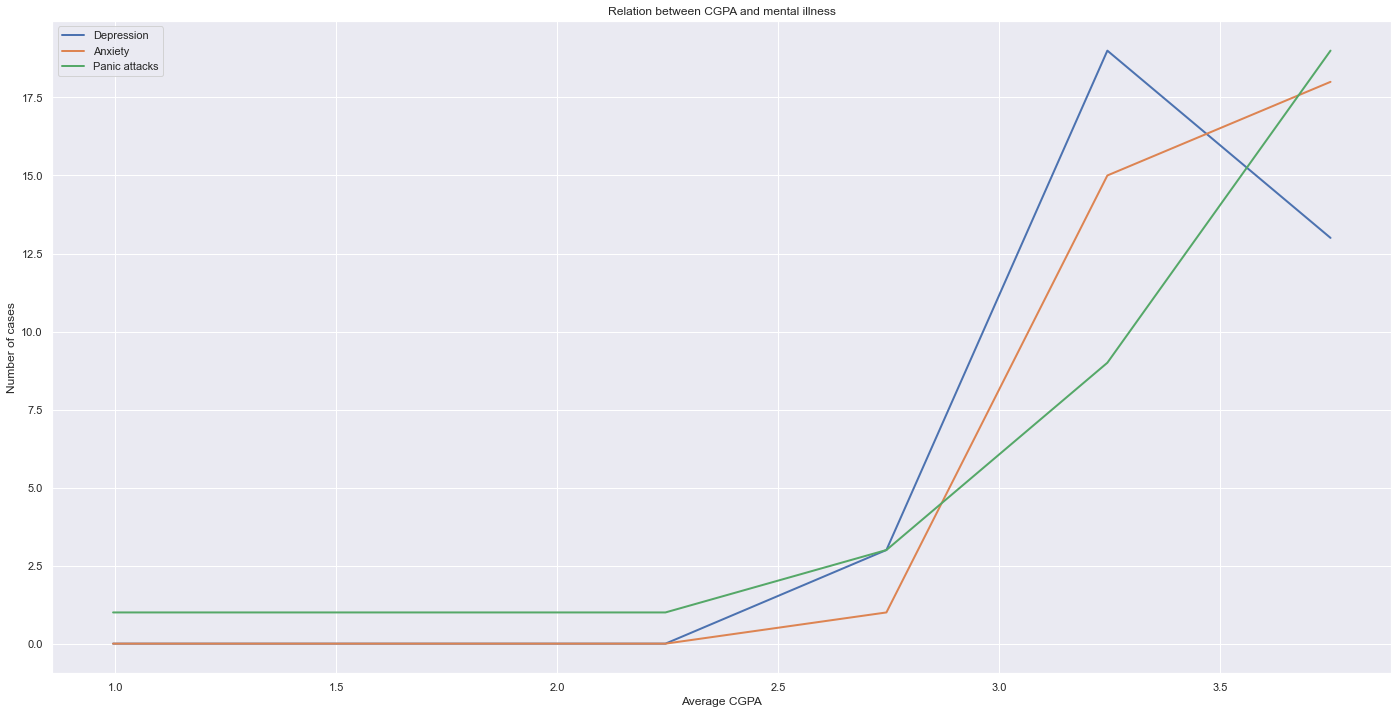

In [22]:
ax = sns.lineplot(x = question1_d.index, y = question1_d.values)
sns.lineplot(x = question1_a.index, y = question1_a.values)
sns.lineplot(x = question1_p.index, y = question1_p.values)
ax.set(xlabel= 'Average CGPA', ylabel='Number of cases', title = 'Relation between CGPA and mental illness')
ax.legend(labels=['Depression', 'Anxiety', 'Panic attacks'])

#### Although the data is small we can clearly see the trend: The higher the cgpa is the more likely the student has some mental issues. This is probably related to pressure that is put on the better students. They have higher ambitions and they put more work into their eductation, by doing it they pretty much always have to sacrefice something like relationships or other stuff - this is only my theory, maybe if we explore further we can see whenever this is true or if we even can make something out from this data.

### 2. Which study fields has the worst mental health status?

In [23]:
mh_df.head()

,date,gender,age,course,year,cgpa,relationship,depressed,anxiety,panic_attacks,seek_for_help,avg_cgpa
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0,3.245
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0,3.245
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,3.245


In [24]:
mh_df.course.unique() # hmmm some of them are super similiar to eachother, like i belive that 'engin' was supposed to be Engineering, lets try to make this column better

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [25]:
mh_df.course = mh_df.course.apply(lambda x: x.lower().strip().title())

In [26]:
mh_df.course.replace({'Engin': 'Engineering', 'Engine': 'Engineering'}, inplace=True)

In [27]:
mh_df.course.unique() # much better

array(['Engineering', 'Islamic Education', 'Bit', 'Laws', 'Mathemathics',
       'Pendidikan Islam', 'Bcs', 'Human Resources', 'Irkhs',
       'Psychology', 'Kenms', 'Accounting', 'Enm', 'Marine Science',
       'Koe', 'Banking Studies', 'Business Administration', 'Law',
       'Kirkhs', 'Usuluddin', 'Taasl', 'Ala', 'Biomedical Science',
       'Benl', 'It', 'Cts', 'Econs', 'Mhsc', 'Malcom', 'Kop',
       'Human Sciences', 'Biotechnology', 'Communication',
       'Diploma Nursing', 'Radiography', 'Fiqh Fatwa', 'Diploma Tesl',
       'Fiqh', 'Nursing'], dtype=object)

In [28]:
by_course = mh_df.groupby('course')

In [29]:
question2_d = by_course['depressed'].sum()
question2_a = by_course['anxiety'].sum()
question2_p = by_course['panic_attacks'].sum()


[Text(0.5, 0, 'Number of cases - depression'), Text(0, 0.5, 'Course name')]

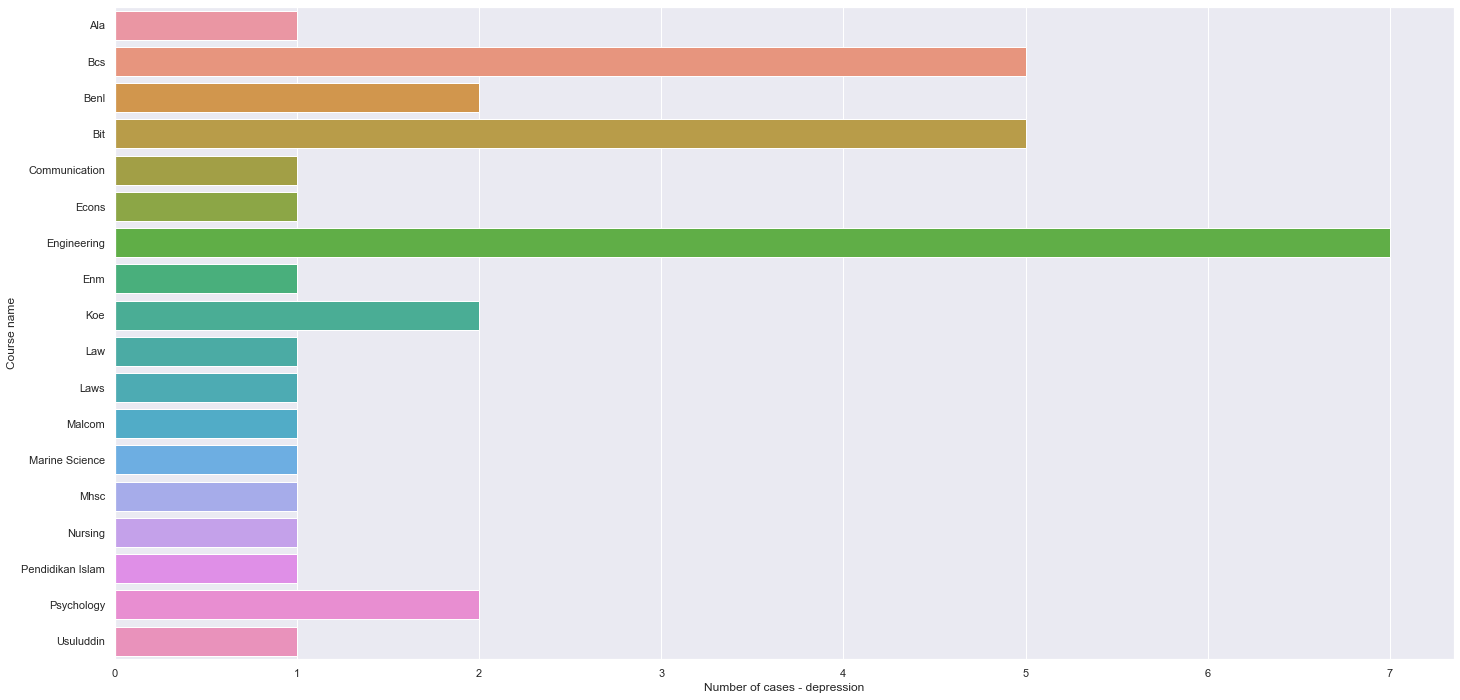

In [30]:
ax = sns.barplot(x = question2_d[question2_d!=0].values, y = question2_d[question2_d!=0].index)
ax.set(xlabel= 'Number of cases - depression', ylabel='Course name')


[Text(0.5, 0, 'Number of cases - anxiety'), Text(0, 0.5, 'Course name')]

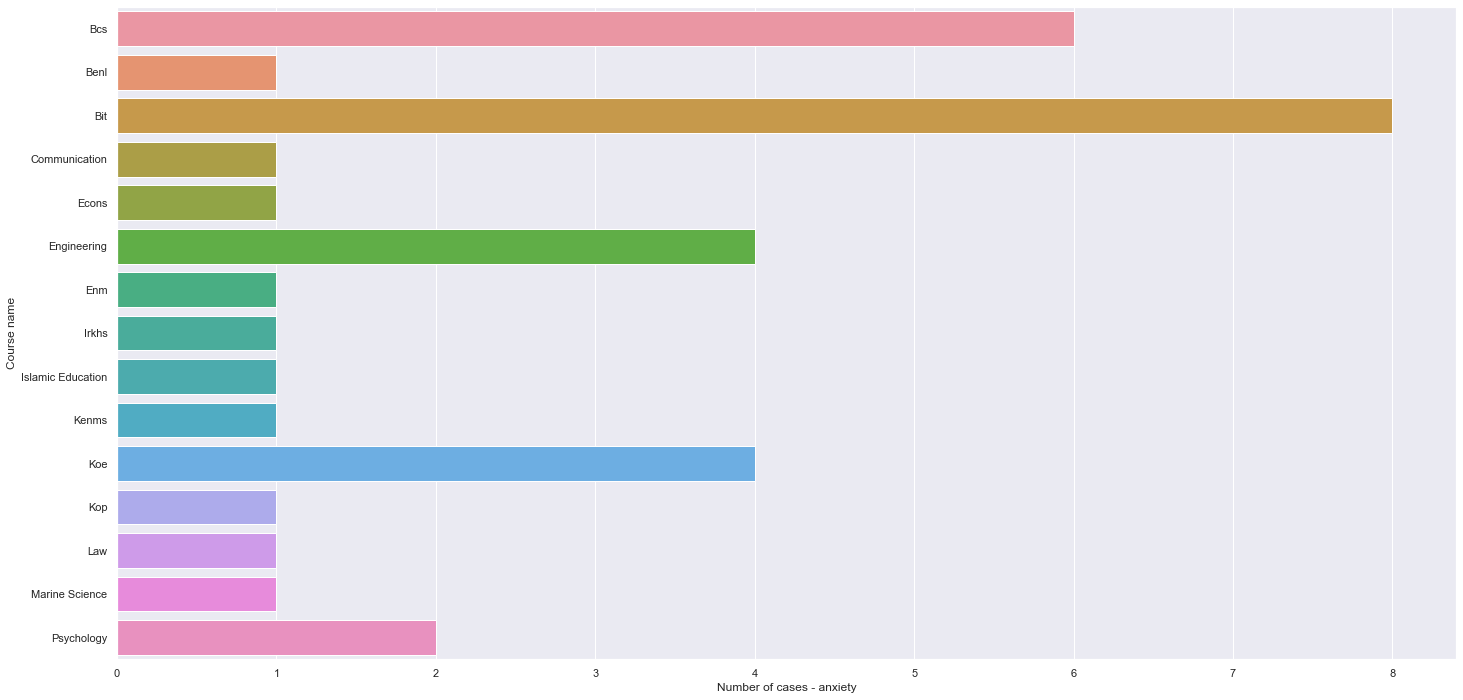

In [31]:
ax = sns.barplot(x = question2_a[question2_a!=0].values, y = question2_a[question2_a!=0].index)
ax.set(xlabel= 'Number of cases - anxiety', ylabel='Course name')

[Text(0.5, 0, 'Number of cases - panic attacks'), Text(0, 0.5, 'Course name')]

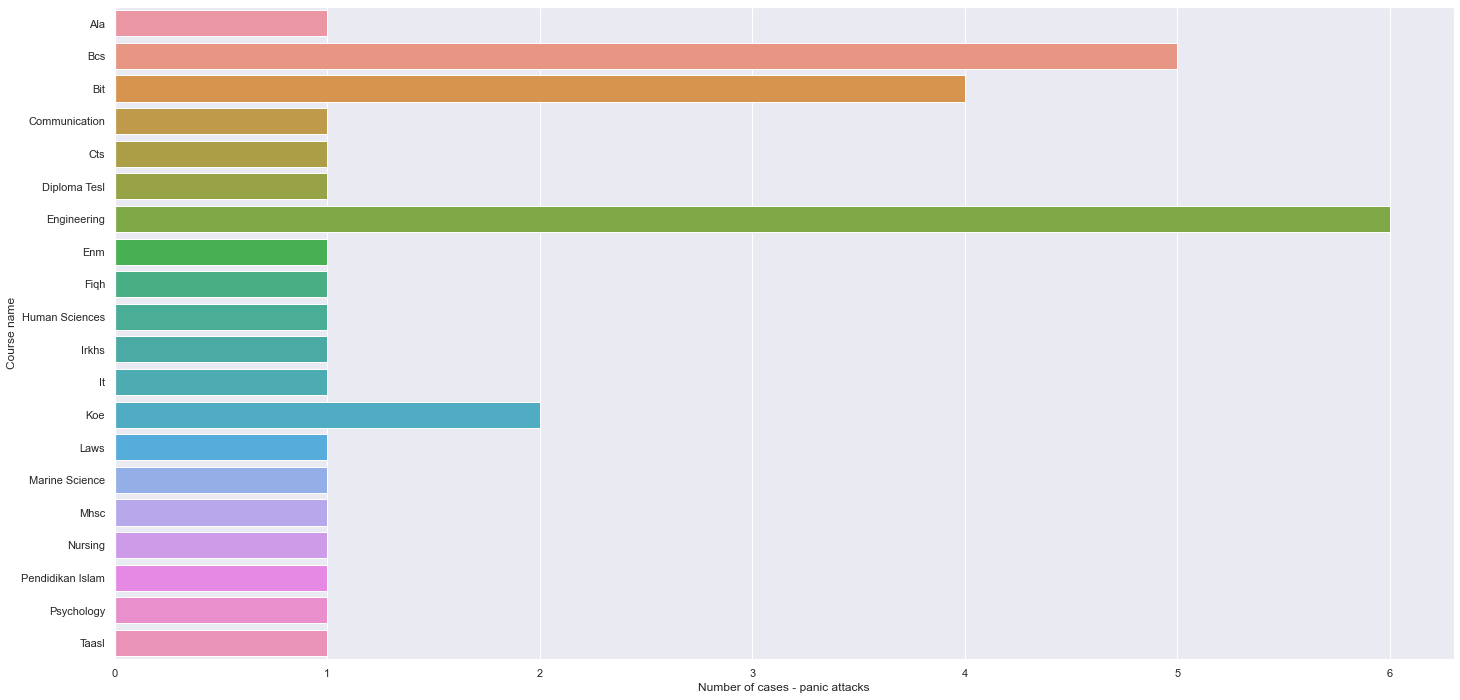

In [32]:
ax = sns.barplot(x = question2_p[question2_p!=0].values, y = question2_p[question2_p!=0].index)
ax.set(xlabel= 'Number of cases - panic attacks', ylabel='Course name')

#### We can clearly see that the worst mental health is in Engineering, BIT (Bachelor In Information Technology) and BCS (Bachelor of Computer Science). All of these three happen to be more introvert oriented courses. These courses are related heavily to technology and therefore they are oriented more towards independent work (less human contact) and a large amount of learning. These are very demanding courses for very ambitious students. This is in line with a previous question where we found out that more ambitious students (those with a higher CGDP) have a higher tendency to have mental illness.

### 3. Does year that someone is currently on affect mental health? Earlier or later years have the better average mental health condition?


In [33]:
mh_df.head()

,date,gender,age,course,year,cgpa,relationship,depressed,anxiety,panic_attacks,seek_for_help,avg_cgpa
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,3.245
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,0,0,1,0,0,3.245
2,8/7/2020 12:05,Male,19.0,Bit,1,3.00 - 3.49,0,1,1,1,0,3.245
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,3.245


In [34]:
mh_df.year.dtype

dtype('int64')

In [35]:
by_year = mh_df.groupby('year')

In [36]:
by_year.sum()

,age,relationship,depressed,anxiety,panic_attacks,seek_for_help,avg_cgpa
year,,,,,,,
1,842.0,1,14,14,14,3,144.650
2,526.0,7,10,10,8,2,87.420
3,509.0,7,10,8,10,1,78.430
4,176.0,1,1,2,1,0,28.485


In [37]:
question3_d = by_year['depressed'].sum()
question3_a = by_year['anxiety'].sum()
question3_p = by_year['panic_attacks'].sum()
    

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Number of cases'),
 Text(0.5, 1.0, 'Relation between year and mental illness')]

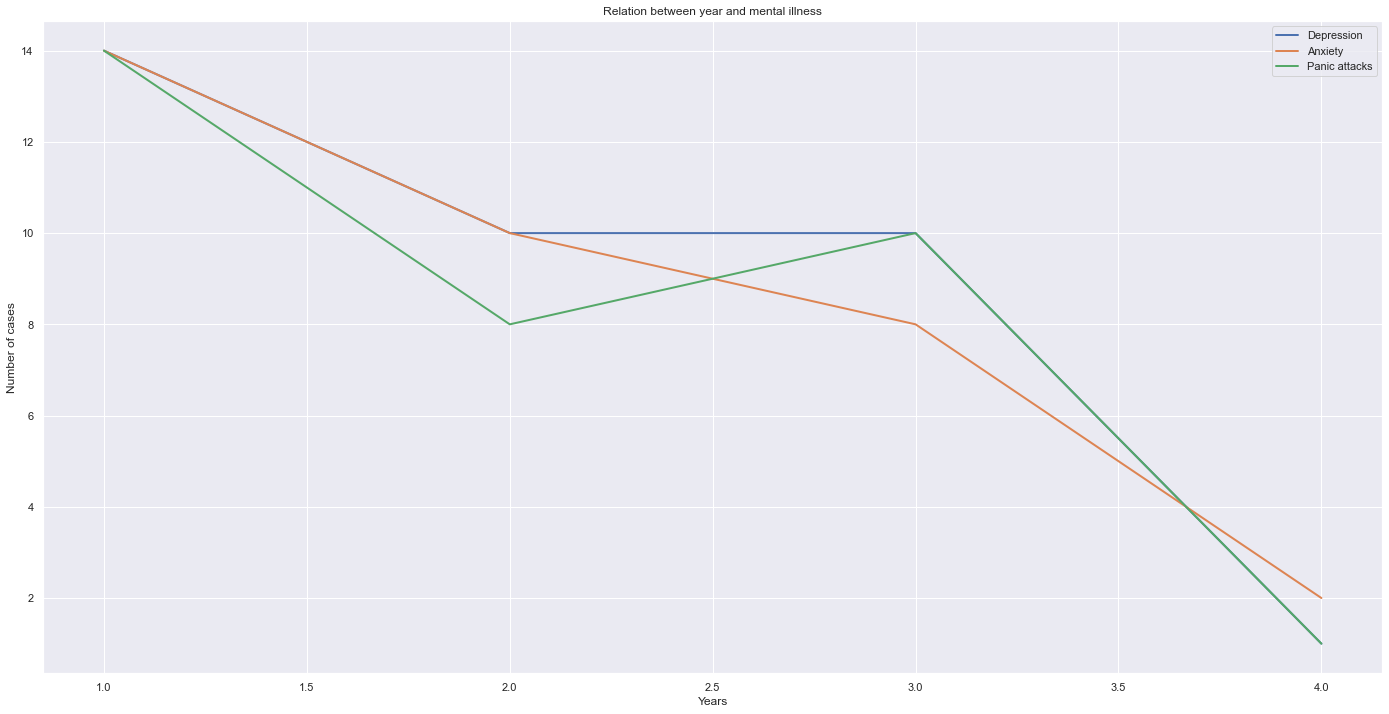

In [38]:
ax = sns.lineplot(x = question3_d.index, y = question3_d.values)
sns.lineplot(x = question3_a.index, y = question3_a.values)
sns.lineplot(x = question3_p.index, y = question3_p.values)
ax.legend(labels=['Depression', 'Anxiety', 'Panic attacks'])
ax.set(xlabel='Years', ylabel='Number of cases', title = 'Relation between year and mental illness')

#### The data shows that the bigger the year the lower the number of positive answers for specific mental health issues. Why is that? It is hard to tell with that low amount of information but maybe the older the students are the more mental stable? Maybe after the first year they are slowly getting used to the situation? They become more calm and focused? It's just a guess, it is hard to read from this data what the case really is, but still the trend is clearly visible. 

### 4. How does age come to mental health status?

In [39]:
mh_df.head()

,date,gender,age,course,year,cgpa,relationship,depressed,anxiety,panic_attacks,seek_for_help,avg_cgpa
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,3.245
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,0,0,1,0,0,3.245
2,8/7/2020 12:05,Male,19.0,Bit,1,3.00 - 3.49,0,1,1,1,0,3.245
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,3.245


In [40]:
by_age = mh_df.groupby('age')
question4_d =by_age['depressed'].sum()
question4_a = by_age['anxiety'].sum()
question4_p = by_age['panic_attacks'].sum()

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of cases'),
 Text(0.5, 1.0, 'Relation between age and mental illness')]

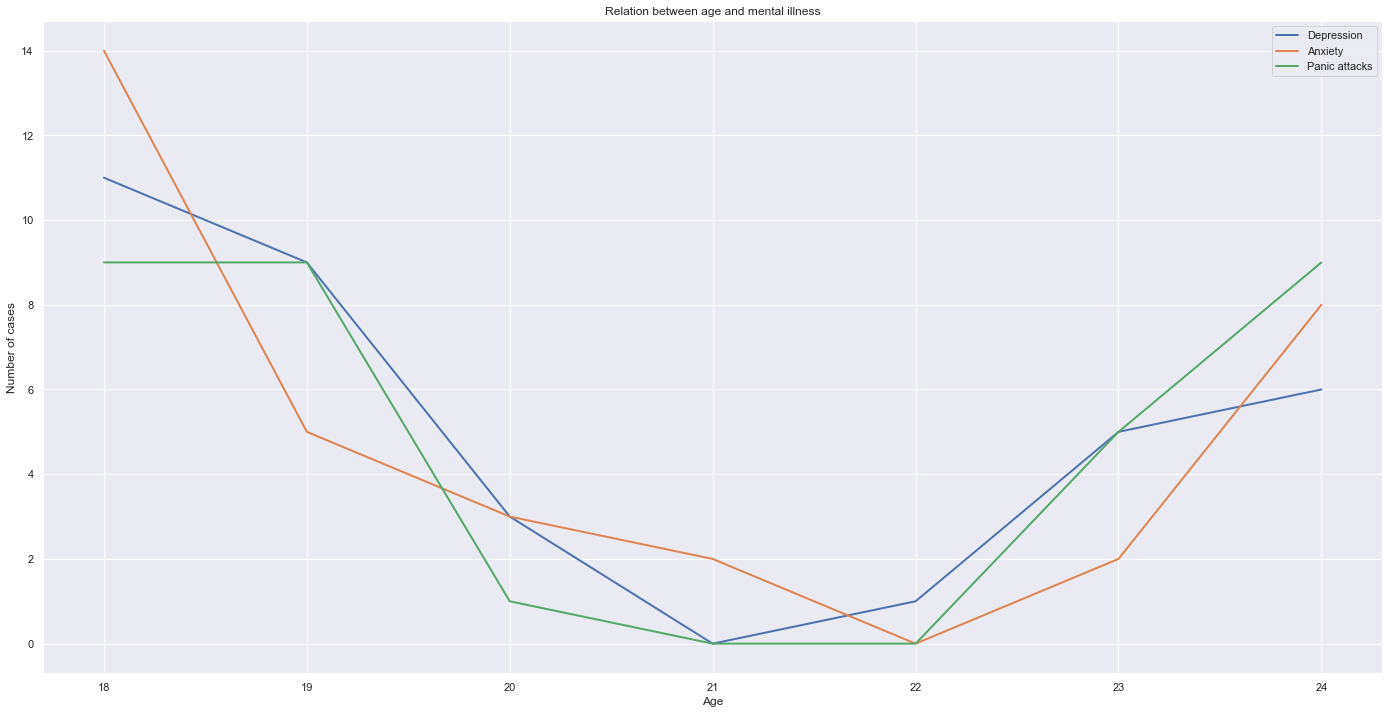

In [41]:
ax = sns.lineplot(x = question4_d.index, y = question4_d.values)
sns.lineplot(x = question4_a.index, y = question4_a.values)
sns.lineplot(x = question4_p.index, y = question4_p.values)
ax.legend(labels=['Depression', 'Anxiety', 'Panic attacks'])
ax.set(xlabel='Age', ylabel='Number of cases', title = 'Relation between age and mental illness')

#### This is interesting... it looks like the most mental stable age for this data is around 21 (early twenties). Why is that? Is it a coincidence because datasize is small? In the range 18-21 there are many cases for mental health issues, it is stabilizing at 21 and then again 21-24 (maybe beyond) it raises again. The first group (18-21) may have problems because they are in new environment and they may feel unsafe at first, then they are getting used to the feeling, so their mental status is getting better. The closer they are to graduation the more mental problems they have. Are they burned out? Maybe they are scared about the future and job finding process? Not much we can actually tell from this data - again - it is only a guess.

In [42]:
by_gender = mh_df.groupby('gender')
question5_all = by_gender[['depressed', 'anxiety', 'panic_attacks']].sum()
question5_melted = pd.melt(question5_all.reset_index(), id_vars='gender', var_name="illness", value_name="status")

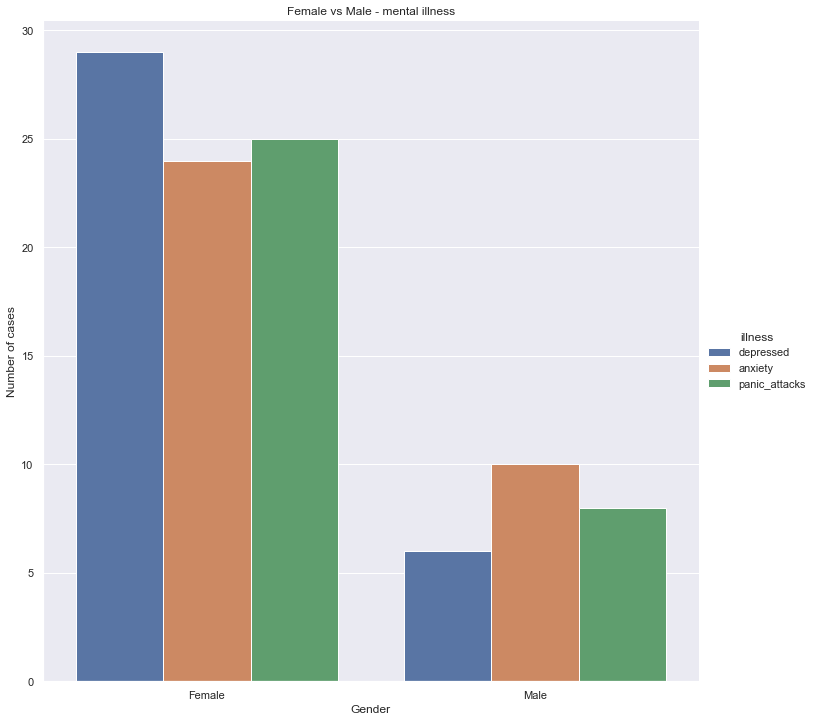

In [43]:
ax = sns.catplot(x = 'gender', y = 'status', hue = 'illness', data=question5_melted, kind='bar', height=10)
ax.set(ylabel = 'Number of cases', xlabel = 'Gender', title = 'Female vs Male - mental illness')


In [44]:
by_gender['date'].count() # 75 females were asked and only 26 males

gender
Female    75
Male      26
Name: date, dtype: int64

#### In this dataset at first it seems that mental issues are more common for females than in males. It is hard to tell what is the truth because the as we can see 75 of 101 people were females and only 26 were males. The groups are not equal at all, so we can not say that females have worse mental status than men. We can see that 40% of females declared to have depression (29 of 75) but only around 23% of men has declared the same (6 of 26). If we take the highest values for any mental health issue it 38% of males declared to have anxiety. 

### 6. Does being in relationship change anything?


In [45]:
by_relationship = mh_df.groupby('relationship')

In [46]:
question6_all = by_relationship[['depressed', 'anxiety', 'panic_attacks']].sum()
question6_melted = pd.melt(question6_all.reset_index(), id_vars='relationship', var_name="illness", value_name="status")

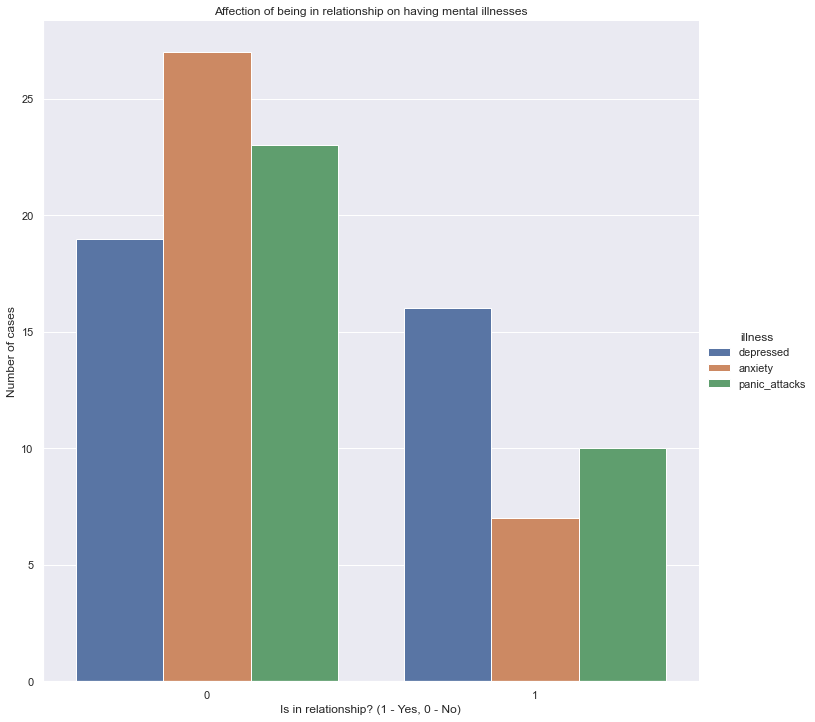

In [47]:
ax = sns.catplot(x = 'relationship', y = 'status', hue = 'illness', data=question6_melted, kind='bar', height=10)
ax.set(ylabel = 'Number of cases', xlabel = 'Is in relationship? (1 - Yes, 0 - No)', title = 'Affection of being in relationship on having mental illnesses')


#### Now this is interesting... we can clearly see that people in relationship are more mental stable than people who are not. People that are in relationship have less chance to have panic attacks, depression and anxiety. The biggest difference is in having anxiety. Poeple (from this dataset) that are in relationship have much less anxiety (because they have someone that they can rely on?). The differnece between depression is not high, it exists but it is not as clear as anxiety or panic attacks.

### So yes, being in relationship can have a huge impact on our mental health and problably self image.

### 7. Is there a correlation between having anxiety and panic attacks? Does having anxiety means that someone has panic attacks? or vice versa? (in regards of this dataset)

In [48]:
anxiety = mh_df.loc[mh_df['anxiety'] == 1, ['anxiety']].sum()
panic_attacks =  mh_df.loc[mh_df['anxiety'] == 1, ['panic_attacks']].sum()
ratio = round((panic_attacks[0] / anxiety[0]) * 100, 2)

In [49]:
print(f'{ratio}% of people that answered "I have anxiety" also answered "I have panic attacks".')

38.24% of people that answered "I have anxiety" also answered "I have panic attacks".


#### As we can see above only around 38% of people that have anxiety also have panic attacks so the correlation is low.

### 8. From all these students how many of them actually seek mental help?

In [50]:
all_students = mh_df['date'].count()
all_students_d = mh_df['depressed'].sum() # biggest part
all_students_a = mh_df['anxiety'].sum()
all_students_p = mh_df['panic_attacks'].sum()
seek_mental_help = mh_df.loc[mh_df['seek_for_help'] == 1].count()
ratio_2 = round((seek_mental_help[0] / all_students_d) * 100, 2)

In [51]:
print(f'In this dataset there is {all_students} people. {all_students_d} of them have depression (most common illness in this data set) only around {ratio_2}% of people with some sort of mental illness  actually answered that they seek for mental help. The rest of them are lone warriors.')

In this dataset there is 101 people. 35 of them have depression (most common illness in this data set) only around 17.14% of people with some sort of mental illness  actually answered that they seek for mental help. The rest of them are lone warriors.


#### In this dataset there is 101 people. 35 of them have depression (most common illness in this data set) only around 17.14% of people with some sort of mental illness  actually answered that they seek for mental help. The rest of them are lone warriors.

### Stay strong and take care of your mental health... after all it is the most precious thing that we have.